In [29]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

from jax import vmap, grad
from jax.experimental.stax import Dense

# Synthetic data generation

We choose our conditional pdf to be
$$
\rho(y | x) \sim \mathcal{N}(\cos(x), 1.5 - \sin(x))
$$
and $x \sim \mathcal{U}(0, \pi)$.

In [25]:
def generate_synthetic_data(rng, n_points):
    
    x_vals = rng.uniform(low=0.0, high=np.pi, size=n_points)
    
    y_vals = np.cos(x_vals) + (1.5 - np.sin(x_vals)) * rng.normal(loc=0.0, scale=1.0, size=n_points)
    
    return x_vals, y_vals

In [46]:
def get_conditional_ppf(x_vals, quantile, h=0.01):
    x_vals = np.arange(start=x_vals.min(), stop=x_vals.max(), step=h)
    ppf_vals = np.cos(x_vals) + (1.5 - np.sin(x_vals)) * scipy.stats.norm.ppf(quantile)
    return x_vals, ppf_vals

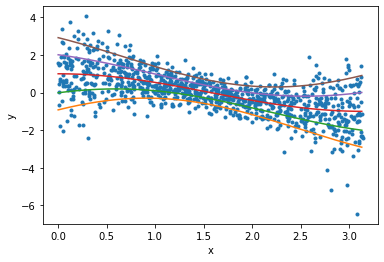

In [47]:
dataset = generate_synthetic_data(np.random.RandomState(123), 1000)

plt.plot(dataset[0], dataset[1], '.')
plt.xlabel('x')
plt.ylabel('y')

for q in [0.1, 0.25, 0.5, 0.75, 0.9]:
    x, y = get_conditional_ppf(dataset[0], q)
    plt.plot(x, y)

In [ ]:
# Useful function 